# Tag Distribution Breakdown

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
pd.options.display.max_columns = None

### HRCS Research Activity Codes
#### Top level RAC codes

In [3]:
ra_df = pd.read_parquet("../data/clean/clean.parquet")
ra_df["count"] = 1
ra_df.head(10)

,FundingOrganisation,OrganisationReference,RA,RA_top,HC,AllText,count
0,Action Medical Research,GN1945,[4.2],[4],[neurological],Over 2 years to investigate improved detection...,1
1,Action Medical Research,GN1890,[5.6],[5],[mental health],Over 30 months to study real-time fMRI Neurofe...,1
2,Action Medical Research,2080,"[2.1, 2.3]",[2],[mental health],Over three years to investigate preterm birth ...,1
3,Action Medical Research,1999,"[2.1, 5.1]","[2, 5]",[disputed aetiology and other],Over three years for investigation of manganes...,1
4,Action Medical Research,2008,"[2.1, 4.1]","[2, 4]","[metabolic and endocrine, neurological]",Over two years to study the metabolic phenotyp...,1
5,Action Medical Research,2019,"[2.1, 4.1]","[2, 4]",[musculoskeletal],Over three years for defining surgical indicat...,1
6,Action Medical Research,2024,[5.3],[5],[reproductive health and childbirth],Over two years to study microneedle-enhanced n...,1
7,Action Medical Research,2030,"[2.1, 4.1]","[2, 4]","[blood, renal and urogenital]",Over two years to investigate a rational strat...,1
8,Action Medical Research,2033,"[1.1, 6.1]","[6, 1]","[metabolic and endocrine, reproductive health ...",Over two years for neuropsychological testing ...,1
9,Action Medical Research,2044,[2.1],[2],"[neurological, inflammatory and immune system]",Over one year for defining the role of autoant...,1


In [4]:
def plot_label_distribution(df, col):
    ra_df_exploded = df.explode(col)
    ra_counts = ra_df_exploded[[col, "count"]].copy()
    ra_counts = ra_counts.groupby(col, as_index=False).sum()
    # sort by count
    ra_counts = ra_counts.sort_values("count", ascending=True)
    ra_counts.plot(kind="barh", y="count", x=col, figsize=(10, 10))
    plt.title(f"{col} distribution")

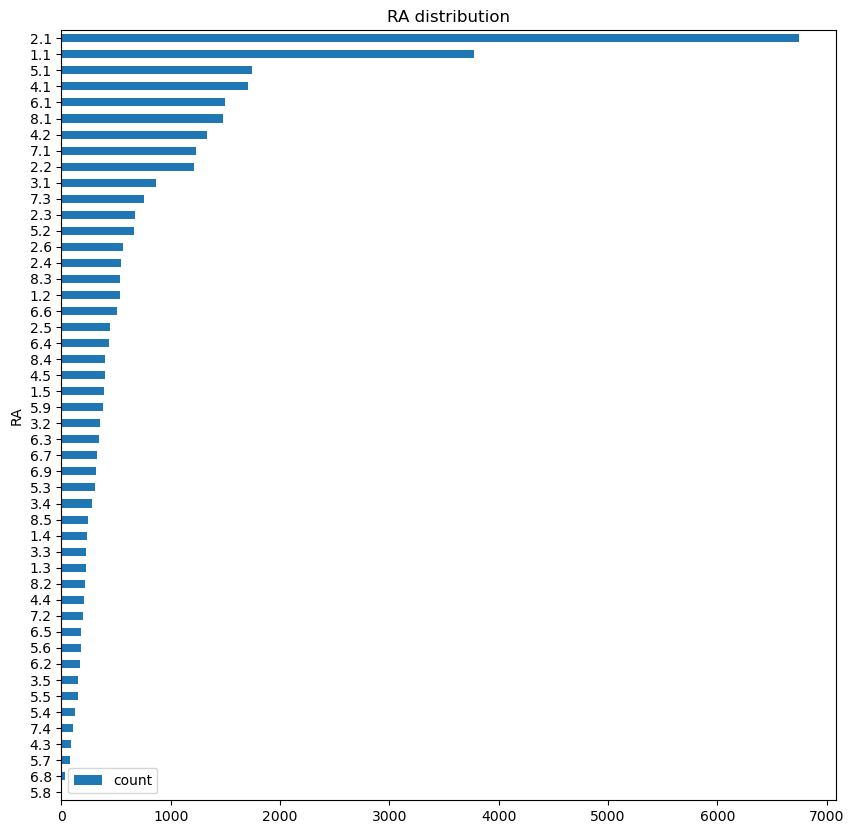

In [5]:
plot_label_distribution(ra_df, "RA")

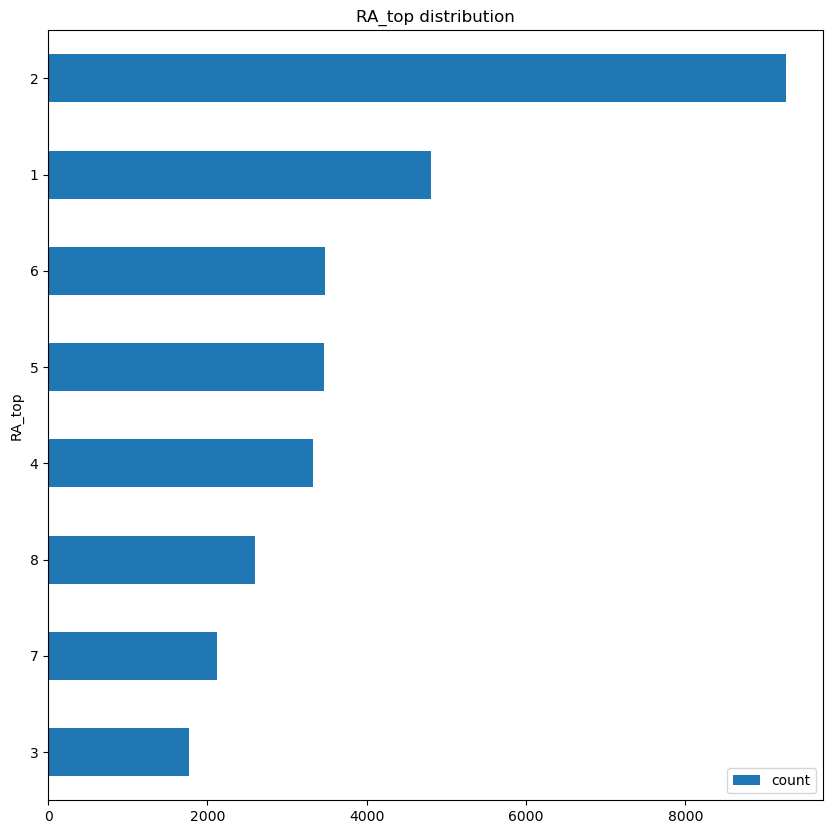

In [6]:
plot_label_distribution(ra_df, "RA_top")

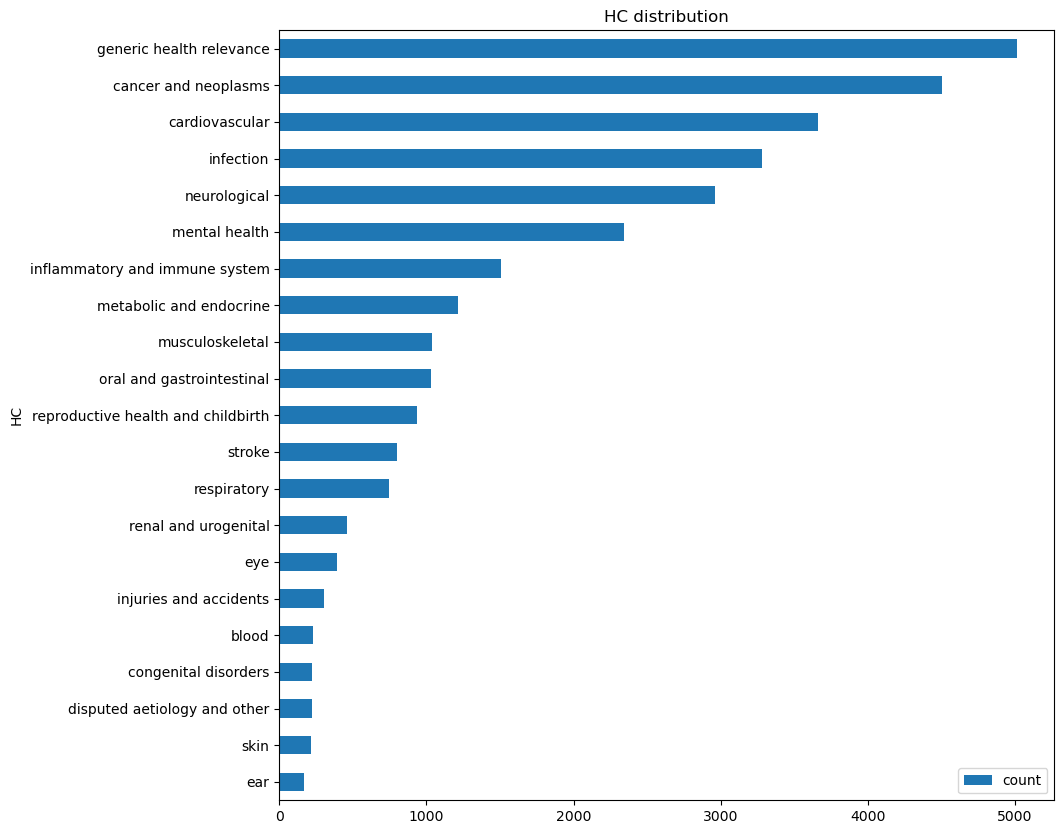

In [7]:
plot_label_distribution(ra_df, "HC")

In [10]:
downsampled_df = ra_df.loc[ra_df["RA"].astype(str) != "['2.1']"]
downsampled_df = pd.concat(
    [
        downsampled_df,
        ra_df.loc[ra_df["RA"].astype(str) == "['2.1']"].sample(1000, random_state=2),
    ]
)

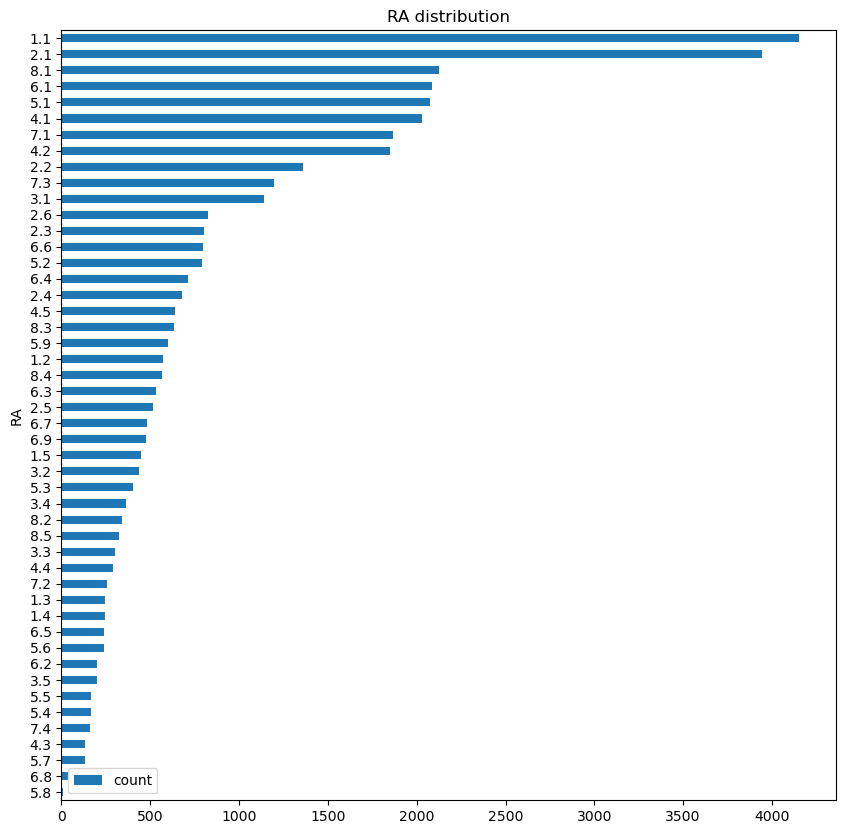

In [13]:
plot_label_distribution(downsampled_df, "RA")

In [21]:
ra_df = pd.read_parquet("../data/clean/clean.parquet")
downsampled_df.to_parquet("../data/clean/clean.parquet", index=False)